Introduction to Machine Learning;
Assignment-1;
Simran Tanwar;
20d070078


In [388]:
import numpy as np
#importing numpy module
import matplotlib.pyplot as plt
#importing matplotlib.pyplot module for plotting
import time
#importing time module to calculate time

# Q1.Write a function to generate a data amtrix X. Inputs:Number of samples, feature dimension. Output: Data Matrix X.

In [389]:
#defining a function to compute data matrix with random values with feature dimension(f) as no. of columns and no. of samples(n) as no. of rows.
def data_matrix(n, f):
  #Return a sample (or samples) from the “standard normal” distribution.
  #source:numpy.org
  X = np.random.randn(n,f)
  return X

In [390]:
#generating a data matrix with feature dimension = 5 and no. of samples = 4
X = data_matrix(4,5)
print('data matrix(X):')
print(X)

data matrix(X):
[[ 0.33030462  1.52545955  0.6140807   2.49127946  1.23569448]
 [-0.29842955  1.50462262 -0.21430496 -0.64830476 -1.56349796]
 [ 2.00078192  1.23941569  1.61309082  0.82187339  0.02840696]
 [-0.95538538 -1.62635743 -2.07951599 -1.29830648 -0.01145073]]


# Q2.Write a function to generate dependent variable column t.
(a) Inputs: Data matrix X, weight vector for each column, bias w0, noise variance.
(b) Output: Target vector t

In [391]:
#defining a function to generate dependent variable column t from data matrix X, weight vector for each column(w), bias w0 and noise variance(v)
def generate_t(X, w, w0, var):
  #calculating y which is inner product of w transpose and X, added to w0
  #not taking wT as python will not make it column vector so taking dot product of X and w
  y = np.dot(X,w) + w0
  # since t = y + e, where e can be gaussian distribution, e is basically the loss
  # we take e as Gaussian distribution with mean 0, output shape is no. of samples
  #source : numpy.org
  sd = var**0.5# calculating standard deviation
  t = y + np.random.normal(0, sd, X.shape[0])# generating dependent variable t, dim : 4x1
  return t

In [392]:
#Example:
#I am taking X generated earlier as data matrix 
#Since weight vector has bias in it so its dimension is always 1 greater than feature dimension of data matrix
w = np.random.rand(X.shape[1]+1)# generating random weight vector of dimension 1 x (X.shape[1] + 1)
w0 = w[0]# bias(w0) = 0.5
var = 0.01# noise_variance = 0.01
t = generate_t(X, w[1:], w0, var) # generating t using the above defined function
print('target vector(t):')
print(t)

target vector(t):
[ 4.33709405 -1.30408826  3.0828618  -2.85380501]


# Q3.Write a function to compute a linear regression estimate. 
a)Input: data matrix X and weight vector w
b)Output: y

In [393]:
#defining a function to compute linear regression estimate with input data matrix(X) and weight vector w and output y
def linear_reg_estimate(X, w):
  y = np.dot(X,w)#The variable y is computed by taking the dot product of X and w.
  return y
#Note that this function is a simple linear regression estimator, it does not include bias term, regularization or other advanced features. 
#It is a basic version of linear regression model.

In [394]:
#example for above function is:
#X = same data matrix I computed above
w = np.random.rand(X.shape[1]+1)# generating random weight vector of dimension 1 x (X.shape[1]+1)
y = linear_reg_estimate(X,w[1:])# computing y without bias term
print('linear rgression estimate output(y):')
print(y)

linear rgression estimate output(y):
[ 1.91684231 -0.84815386  0.98138895 -1.07308264]


# Q4. Write a function to compute the mean square error of two vectors y and t.

In [395]:
#defining a function to compute mean square error of the 2 vectors y and t
def mse(y,t):
  l = len(y)#length of y or we can also use length of t as both will be same
  #take sum of error square, where error is y-t
  squared_sum = np.sum(np.square(y-t)) 
  mse = squared_sum/l#mean square error is (1/l)*squared_sum
  return mse

In [396]:
Mean_square_error = mse(y,t)#calculating mse for above computed y and t
print('mean square error:')
print(Mean_square_error)

mean square error:
3.4131637287860235


# Q5.Write a function to estimate the weights of linear regression using pseudo-inverse, assuming L2 regularization:
a)Input: X, t, and lambda
b)Output: W, MSE, Y

In [397]:
#defining a function to estimate the weights of linear regression using pseudo-inverse, assuming L2 regularization
def estimate_weights_L2_reg(X,t,lam):
  #create an array with dimensions of X with one extra column with all values one
  #because we want to estimate weight vector, in which bias term(w0) will also be there 
  X_n = np.ones((X.shape[0],X.shape[1]+1))
  #X_n is a matrix with all values equal to our data matrix with one extra column with all values in that column 1
  X_n[:,1:] = X #dimension of X_n will be (n,f+1)

  #Now we want to estimate weight vector(w)
  # w = (lambda*I + X_n.T*X)^(-1).(X_n.T).t
  u = X_n.shape[1] #to get the dimension of Identity matrix
  I = np.identity(u) #identity matrix, source:numpy.org
  #dimensions of I matrix = (f+1,f+1)
  b = lam*I + np.dot(X_n.T,X_n) #we need inverse of this matrix to estimate w
  b_i = np.linalg.inv(b) #taking inverse of b
  # source: https://numpy.org/doc/stable/reference/generated/numpy.linalg.inv.html
  w = np.dot(np.dot(b_i, X_n.T), t) #weight vector = [(lam*I + X_n.T.X)^-1].X_n.T.t(pseudo inverse)
  y = linear_reg_estimate(X,w[1:]) #computing y
  mse_n = mse(y,t) #computing MSE
  return w, mse_n, y

In [398]:
weights = estimate_weights_L2_reg(X,t,2) #estimating weight vector for above data matrix(X) and target vector(t)
print('Estimated Weight vector:')
print(weights[0])
print('MSE:')
print(weights[1])
print('Y:')
print(weights[2])

Estimated Weight vector:
[0.16870761 0.41107341 0.3240982  0.4511068  0.84346461 0.55403837]
MSE:
0.15733983387643305
Y:
[ 3.69312234 -1.14476539  2.66079654 -2.95933656]


# Q6. Write a function to compute the gradient of MSE with respect to its weight vector.
a)Input: X matrix, t vector, and w vector
b)Output: gradient vector

In [399]:
#defining a funtion to compute the gradient of MSE with respect to itw weight vector
def gradient_mse(X,t,w):
  #create an array with dimensions of X with one extra column with all values one
  #because we want to estimate weight vector, in which bias term(w0) will also be there
  X_n = np.ones((X.shape[0],X.shape[1]+1))
  #X_n is a matrix with all values equal to our data matrix with one extra column with all values in that column 1
  X_n[:,1:] = X #dimension of X_n will be (n,f+1)
  #we are computing gradient of MSE which is (t - wT.X).X/l
  y = np.dot(X_n,w)
  l = len(y) #no of elements in y
  gradient = np.dot((y-t),X_n)/l
  #dimension of gradient(f+1,1) i.e. same as weight vector
  return gradient

In [400]:
#example using above X ,t and w
gradient = gradient_mse(X,t,w)
print('Gradient of MSE:')
print(gradient)

Gradient of MSE:
[-0.22283525 -1.61649851 -1.89643061 -2.17501721 -2.47200737 -0.97298507]


# Q7. Write a function to compute L2 norm of a vector w passed as a numpy array. Exclude bias w0.

In [401]:
#defining a function to comupte L2 norm of vector w excluding bias w0
def L2_norm_w(w):
  #L2 norm of w is square root of |w0|^2 + |w1|^2 + |w3|^2 + ....
  #since we need L2 norm excluding bias w0 then our L2 norm will be square root of |w1|^2 + |w3|^2 + ....
  #exclude bias w0 by slicing the array
  w_without_bias_2 = w[1:] #w without bias w0
  L2_norm = np.sqrt(np.sum(np.square(w_without_bias_2))) #source:numpy.org
  return L2_norm

In [402]:
#example
#using w_a
w_a = [1, 1,-2,3]
norm_L2_w = L2_norm_w(w_a)
print('L2 norm of w without bias:')
print(norm_L2_w)


L2 norm of w without bias:
3.7416573867739413


#Q8.Write a function to compute the gradient of L2 norm with respect to the weight vectors.
a) Input: X matrix and w vector
b) Output: gradient vector, where gradient with respect to w0 is 0.

In [403]:
def L2_norm_gradient(w):
    #Exclude bias w0 by slicing the array
    w_without_bias_2g = w[1:]
    #Create a zero array of the same shape as w, since gradient wrt w0 is 0
    #therefore the first element of gradient vector will be 0
    gradient = np.zeros(len(w))
    #Compute the gradient of L2 norm for w, excluding the bias w0
    gradient[1:] = w_without_bias_2g/L2_norm_w(w)
    return gradient


In [404]:
#example using the above computed w_a
grad_L2_norm_w = L2_norm_gradient(w_a)
print('Gradient of L2 norm with respect to w:')
print(grad_L2_norm_w)

Gradient of L2 norm with respect to w:
[ 0.          0.26726124 -0.53452248  0.80178373]


# Q9. Write a function to compute L1 norm of a vector w passed as a numpy array. Exclude bias w0.

In [405]:
#defining a function to compute L1 norm of a vector w, excluding bias w0
def L1_norm_w(w):
  #exclude bias w0 by slicing the array
  w_without_bias = w[1:]
  #L1 norm is sum of the absolute values of all the term that means |w1| + |w2| + |w3| +....
  sum = np.sum(np.abs(w_without_bias)) #abs() for taking absolute values and np.sum() to sum all the terms
  return sum


In [406]:
#Example, using the w_a computed above
norm_L1_w = L1_norm_w(w_a)
print('L1 norm of w, excluding bias w0:')
print(norm_L1_w)

L1 norm of w, excluding bias w0:
6


# Q10.Write a function to compute the gradient of L1 norm with respect to the weight vectors.
a)Input: X matrix and w vector
b)Output: gradient vector, where gradient with respect to w0 is 0.

In [407]:
def L1_norm_gradient(w):
    #Exclude bias w0 by slicing the array
    w_without_bias = w[1:]
    #Create a zero array of the same shape as w, since gradient wrt w0 is 0
    #therefore the first element of gradient vector will be 0
    gradient = np.zeros(len(w))
    #Compute the gradient of L2 norm for w, excluding the bias w0
    #np.sign() : Returns an element-wise indication of the sign of a number.
    #The sign function returns -1 if x < 0, 0 if x==0, 1 if x > 0.
    #source : https://numpy.org/doc/stable/reference/generated/numpy.sign.html
    gradient[1:] = np.sign(w[1:])
    return gradient

In [408]:
#example using the above computed w
grad_L1_norm_w = L1_norm_gradient(w_a)
print('Gradient of L1 norm with respect to w:')
print(grad_L1_norm_w)

Gradient of L1 norm with respect to w:
[ 0.  1. -1.  1.]


# Q11. Write a function for a single update of weights of linear regression using gradient descent. 
a) Input: X, t, w, eta, lambda 2, lambda 1. Note that the weight of MSE will be 1 b)
Output: updated weight and updated MSE

In [409]:
#defining a function for a single update of weights of linear regression using gradient descent
#weight of MSE is 1
def linear_regression_update(X,t,w,eta,lam1,lam2):
  #create an array with dimensions of X with one extra column with all values one
  #because we want to estimate weight vector, in which bias term(w0) will also be there
  X_n = np.ones((X.shape[0],X.shape[1]+1))
  #X_n is a matrix with all values equal to our data matrix with one extra column with all values in that column 1
  X_n[:,1:] = X #dimension of X_n will be (n,f+1)
  #computing gradient of MSE using defined function in Q6
  grad_MSE = gradient_mse(X,t,w)
  #computing gradient of L2_norm wrt w using defined function in Q8
  grad_L2_norm = L2_norm_gradient(w)
  #computing gradient of L1_norm wrt w using defined fucntion in Q10
  grad_L1_norm = L1_norm_gradient(w)
  #computing updated w using formula w(old) - eta(gradient of(MSE + lambda1*L1norm + lambda2*L2norm))
  w_new = w - eta*(grad_MSE + lam1*grad_L1_norm + lam2*grad_L2_norm)
  #computing new y using defined function in Q3 with w_new as input
  y_new = linear_reg_estimate(X_n, w_new)
  #computing updated MSE using defined function in Q4 with new y as input
  updated_MSE = mse(y_new,t)
  return w_new, updated_MSE

In [410]:
#example using above X,t and w
#eta = 0.1
#lam1 = 0.01 and lam2 = 0.01
updated_linear_regression = linear_regression_update(X,t,w,0.1,0.01,0.01)
print('w_old:')
print(w)
print('Old MSE:')
print(Mean_square_error)
print('updated_linear_regression:')
print('update_w:')
print(updated_linear_regression[0])
print('updated_MSE:')
print(updated_linear_regression[1])

w_old:
[0.3484317  0.15344881 0.23931056 0.08284925 0.27567806 0.61781589]
Old MSE:
3.4131637287860235
updated_linear_regression:
update_w:
[0.37071523 0.31389087 0.42762957 0.29923879 0.5215055  0.7132778 ]
updated_MSE:
0.6131774493034324


#Q12. Write a function to estimate the weights of linear regression using gradient descent. 
a)Inputs: X, t, lambda2 (default 0), lambda1 (default 0), eta, max_iter, min_change_NRMSE
b)Output: Final w, final RMSE normalized with respect to variance of t.
c)Stopping criteria: Either max_iter has been reached, or the normalized RMSE does not change by more than min change NRMSE

In [411]:
#defining a fucntion to compute NRMSE
def compute_NRMSE(mse_d, t):
    #Compute normalized root mean squared error (NRMSE)
    return np.sqrt(mse_d)/np.std(t)

In [412]:
#defining a function to estimate the weights of linear regression using gradient descent
#taking min_change_NRMSE = 1e-5(small)
def linear_regression_gd(X, t, lam1=0, lam2=0, eta=0.01, max_iter=2000, min_change_NRMSE=1e-5):
  #taking dimensions of X to generate suitable weight matrix with all values equal to 1 initially
  n, f = X.shape
  #w vector of dim f+1 
  w = np.ones(f+1)
  #take initial NRMSE = 100 so that it won't be close to the point where it's gradient become 0
  NRMSE_old = 100
  for i in range(max_iter):
    updated_LR = linear_regression_update(X,t,w,eta,lam1,lam2)
    NRMSE_current = compute_NRMSE(updated_LR[1],t)
    #check for stopping criteria
    if np.abs(NRMSE_current - NRMSE_old) < min_change_NRMSE:
      break
    else:
      NRMSE_old = NRMSE_current
    w_new = updated_LR[0]
  return w_new, NRMSE_old

In [413]:
#example using above X and t
w_nrmse = linear_regression_gd(X,t)
print('Final w:')
print(w_nrmse[0])
print('final RMSE normalized with respect to variance of t:')
print(w_nrmse[1])

Final w:
[0.98638151 0.97527993 0.96518858 0.97058235 0.96963487 0.99508565]
final RMSE normalized with respect to variance of t:
0.8219064926894801


# Q13.Run multiple experiments (with different random seeds) for, plot the results of (box plots), and comment on the trends and potential reasons for the following relations:


# (a)Training and validation NRMSE obtained using pseudo inverse with number of training samples 

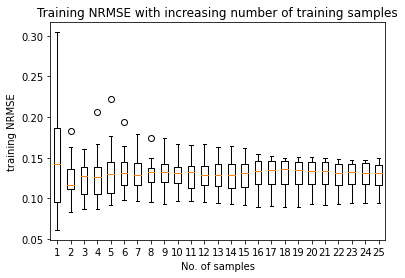

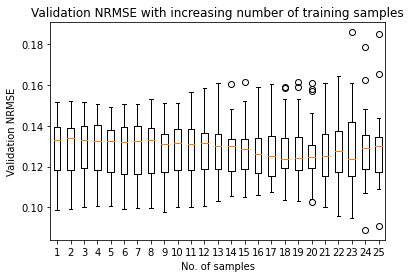

In [414]:
#Set the random seed to ensure the reproducibility of results
seed = 20
#Define different number of training samples
#np.arange(start,stop,step) : Return evenly spaced values within a given interval.
#source : https://numpy.org/doc/stable/reference/generated/numpy.linspace.html
#sample train will be like 5, 20, 35,....
n_samples_train = np.arange(5, 251, 10)
#Define the noise variance of the noise added to the target variable
n_var = 0.05
#Define Number of samples for data_matrix
N = 310 #which is greater than the maximum number of samples in sample train
#Define feature dimension
F = 10
#Define lambda
lam_2= 0.01
#Initialize arrays to store the training and validation NRMSE for each number of training samples
train_NRMSE = []
valid_NRMSE = []
#Loop over different number of training samples
for n in n_samples_train:
  #Initialize arrays to store the training and validation NRMSE for each seed
  train_NRMSE_seed = []
  valid_NRMSE_seed = []
  #for n = 5 and seed = 0, there will be some array for training and validation data
  #then for n = 5 and seed =1, there will be some array, and going on,
  #these arrays will be stored in seed array and then these are appended in last array which is for different n
  for i in range(seed):
    np.random.seed(i)
    #Generate data using previously defined functions
    x_d = data_matrix(N,F)
    #Define the weight vector to generate t vector
    W_v = np.random.rand(F+1)
    #Generate t vector using previously defined fucntion
    t = generate_t(x_d, W_v[1:], W_v[0], n_var)
    #Fit the linear regression model on data using previously defined functions
    W_n = estimate_weights_L2_reg(x_d,t,lam_2)[0]#weight vetor using pseudo inverse and lambda small
    y = linear_reg_estimate(x_d, W_n[1:]) + W_n[0]
    #splitting data into training and validation
    #training data
    t_train = t[:n]
    y_train = y[:n]
    #Compute MSE on training data
    train_mse = mse(y_train,t_train)
    #Compute the NRMSE on training data
    train_NRMSE_seed.append(compute_NRMSE(train_mse, t_train))
    #validation data
    t_valid = t[n:]
    y_valid = y[n:]
    #Compute MSE on validation data
    valid_mse = mse(y_valid,t_valid)
    #Compute the NRMSE on validation data
    valid_NRMSE_seed.append(compute_NRMSE(valid_mse, t_valid))
  
  train_NRMSE.append(train_NRMSE_seed)
  valid_NRMSE.append(valid_NRMSE_seed)

# Plot the results using box plots
plt.boxplot(train_NRMSE)
plt.xlabel('No. of samples')
plt.ylabel('training NRMSE')
plt.title('Training NRMSE with increasing number of training samples')
plt.show()

plt.boxplot(valid_NRMSE)
plt.xlabel('No. of samples')
plt.ylabel('Validation NRMSE')
plt.title('Validation NRMSE with increasing number of training samples')
plt.show()


**Observations:** For less number of samples, it is easy to fit for linear regression, so less error and when number of of samples increases, it is harder to fit in linear regression, hence error increases.

In case of validation data, as the number of samples increases, error drecreases upto a point and then start increasing.

# (b) Training and validation NRMSE obtained using pseudo inverse with number of variables

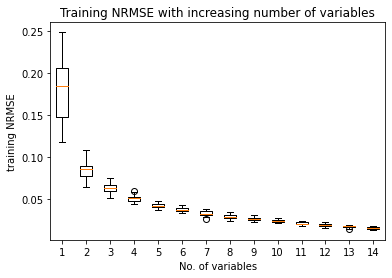

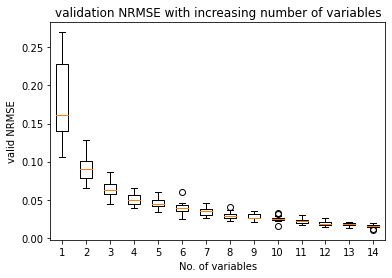

In [415]:
#Define different number of variables
#np.arange(start,stop,step) : Return evenly spaced values within a given interval.
#source : https://numpy.org/doc/stable/reference/generated/numpy.linspace.html
n_variable_train = np.arange(5, 201, 15)
#Define the noise variance of the noise added to the target variable
n_var = 0.05
#Define Number of samples for data_matrix
N = 300
#Define feature dimension
F = 10
#Define lambda
lam_2= 0.01
#Initialize arrays to store the training and validation NRMSE for each number of training variables
train_NRMSE_b = []
valid_NRMSE_b = []
#Loop over different number of training samples
for f in n_variable_train:
  #Initialize arrays to store the training and validation NRMSE for each seed
  train_NRMSE_seed = []
  valid_NRMSE_seed = []
  for i in range(seed):
    np.random.seed(i)
    #Generate data using previously defined functions
    x_d = data_matrix(N,f)
    #Define the weight vector to generate t vector
    W_v = np.random.rand(f+1)
    #Generate t using previously defined function
    t = generate_t(x_d, W_v[1:], W_v[0], n_var)
    #Fit the linear regression model on data using previously defined functions
    W_n = estimate_weights_L2_reg(x_d,t,lam_2)[0]#weight vetor using pseudo inverse and lambda small
    y = linear_reg_estimate(x_d, W_n[1:]) + W_n[0]
    #splitting data into training and validation
    #Splitting data in approx 80-20%
    #training data
    t_train = t[:250]
    y_train = y[:250]
    #Compute MSE on training data
    train_mse = mse(y_train,t_train)
    #Compute the NRMSE on training data
    train_NRMSE_seed.append(compute_NRMSE(train_mse, t_train))
    #validation data
    t_valid = t[250:]
    y_valid = y[250:]
    #Compute MSE on validation data
    valid_mse = mse(y_valid,t_valid)
    #Compute the NRMSE on validation data
    valid_NRMSE_seed.append(compute_NRMSE(valid_mse, t_valid))
  
  train_NRMSE_b.append(train_NRMSE_seed)
  valid_NRMSE_b.append(valid_NRMSE_seed)

# Plot the results using box plots
plt.boxplot(train_NRMSE_b)
plt.xlabel('No. of variables')
plt.ylabel('training NRMSE')
plt.title('Training NRMSE with increasing number of variables')
plt.show()

plt.boxplot(valid_NRMSE_b)
plt.xlabel('No. of variables')
plt.ylabel('valid NRMSE')
plt.title('validation NRMSE with increasing number of variables')
plt.show()

**Observation:**As the feature dimension increases, we have more data and hence error is less

# (c)Training and validation NRMSE obtained using pseudo inverse with noise variance 

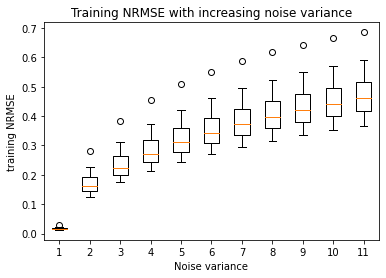

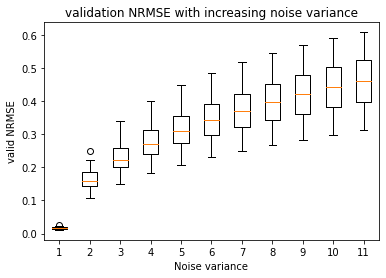

In [416]:
#Define different noise variance
#np.arange(start,stop,step) : Return evenly spaced values within a given interval.
#source : https://numpy.org/doc/stable/reference/generated/numpy.linspace.html
n_variance_train = np.arange(0.001, 1.1, 0.1)
#Define the noise variance of the noise added to the target variable
n_var = 0.05
#Define Number of samples for data_matrix
N = 300
#Define feature dimension
F = 10
#Define lambda
lam_2 = 0.01
#Initialize arrays to store the training and validation NRMSE for each noise variance
train_NRMSE_c = []
valid_NRMSE_c = []
#Loop over different number of training samples
for var_n in n_variance_train:
  train_NRMSE_seed = []
  valid_NRMSE_seed = []
  for i in range(seed):
    np.random.seed(i)
    #Generate data using previously defined functions
    x_d = data_matrix(N,F)
    #Define the weight vector to generate t vector
    W_v = np.random.rand(F+1)
    t = generate_t(x_d, W_v[1:], W_v[0],var_n)
    #Fit the linear regression model on data using previously defined functions
    W_n = estimate_weights_L2_reg(x_d,t,lam_2)[0]#weight vetor using pseudo inverse and lambda small
    y = linear_reg_estimate(x_d, W_n[1:]) + W_n[0]
    #print(len(y))
    #splitting data into training and validation
    #training data
    t_train = t[:250]
    y_train = y[:250]
    #print(len(y_train))
    #Compute MSE on training data
    train_mse = mse(y_train,t_train)
    #Compute the NRMSE on training data
    train_NRMSE_seed.append(compute_NRMSE(train_mse, t_train))
    #validation data
    t_valid = t[250:]
    y_valid = y[250:]
    #print(len(y_valid))
    #Compute MSE on validation data
    valid_mse = mse(y_valid,t_valid)
    #Compute the NRMSE on validation data
    valid_NRMSE_seed.append(compute_NRMSE(valid_mse, t_valid))
  
  train_NRMSE_c.append(train_NRMSE_seed)
  valid_NRMSE_c.append(valid_NRMSE_seed)

# Plot the results using box plots
plt.boxplot(train_NRMSE_c)
plt.xlabel('Noise variance')
plt.ylabel('training NRMSE')
plt.title('Training NRMSE with increasing noise variance')
plt.show()

plt.boxplot(valid_NRMSE_c)
plt.xlabel('Noise variance')
plt.ylabel('valid NRMSE')
plt.title('validation NRMSE with increasing noise variance')
plt.show()

**Observation:** As noise variance increases, error also increases, because error is gaussian distribution, it increases as noise variance increases.

# (d)Training and validation NRMSE obtained using pseudo inverse with w0

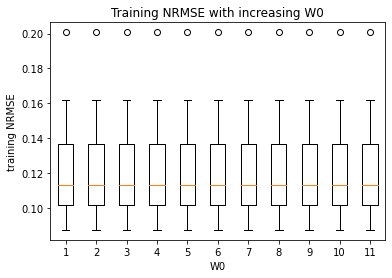

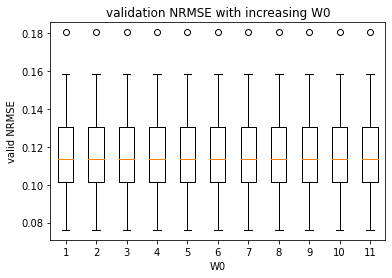

In [417]:
#Define different W0(bias)
#np.arange(start,stop,step) : Return evenly spaced values within a given interval.
#source : https://numpy.org/doc/stable/reference/generated/numpy.linspace.html
W0_train = np.arange(0.001, 1.1, 0.1)
#Define the noise variance of the noise added to the target variable
n_var = 0.05
#Define Number of samples for data_matrix
N = 300
#Define feature dimension
F = 10
#Define lambda
lam_2 = 0.01
#Initialize arrays to store the training and validation NRMSE for each bias term
train_NRMSE_d = []
valid_NRMSE_d = []
#Loop over different number of training samples
for w_o in W0_train:
  train_NRMSE_seed = []
  valid_NRMSE_seed = []
  for i in range(seed):
    np.random.seed(i)
    #Generate data using previously defined functions
    x_d = data_matrix(N,F)
    #Define the weight vector to generate t vector
    W_v = np.random.rand(F+1)
    W_v[0] = w_o
    t = generate_t(x_d, W_v[1:], W_v[0],n_var)
    #Fit the linear regression model on data using previously defined functions
    W_n = estimate_weights_L2_reg(x_d,t,lam_2)[0]#weight vetor using pseudo inverse and lambda small
    y = linear_reg_estimate(x_d, W_n[1:]) + W_n[0]
    #print(len(y))
    #splitting data into training and validation
    #training data
    t_train = t[:250]
    y_train = y[:250]
    #print(len(y_train))
    #Compute MSE on training data
    train_mse = mse(y_train,t_train)
    #Compute the NRMSE on training data
    train_NRMSE_seed.append(compute_NRMSE(train_mse, t_train))
    #validation data
    t_valid = t[250:]
    y_valid = y[250:]
    #print(len(y_valid))
    #Compute MSE on validation data
    valid_mse = mse(y_valid,t_valid)
    #Compute the NRMSE on validation data
    valid_NRMSE_seed.append(compute_NRMSE(valid_mse, t_valid))
  
  train_NRMSE_d.append(train_NRMSE_seed)
  valid_NRMSE_d.append(valid_NRMSE_seed)

# Plot the results using box plots
plt.boxplot(train_NRMSE_d)
plt.xlabel('W0')
plt.ylabel('training NRMSE')
plt.title('Training NRMSE with increasing W0')
plt.show()

plt.boxplot(valid_NRMSE_d)
plt.xlabel('W0')
plt.ylabel('valid NRMSE')
plt.title('validation NRMSE with increasing W0')
plt.show()

**Observation:** There won't be any effect on error as w0 is used to compute y and t both and while calculating error it will cancel out and thus no effect on error.

# (e) Training and validation NRMSE obtained using pseudo inverse with lambda2

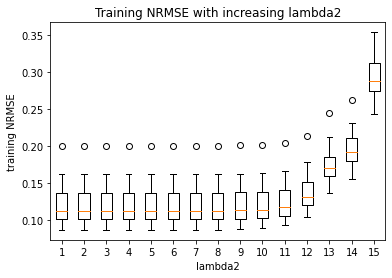

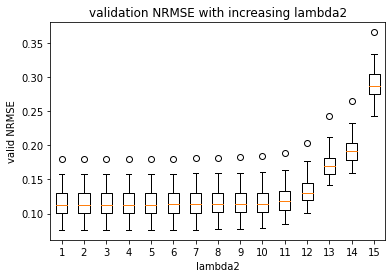

In [418]:
#Define different lambda2
#np.arange(start,stop,step) : Return evenly spaced values within a given interval.
#source : https://numpy.org/doc/stable/reference/generated/numpy.linspace.html
lambda2_train = [0.001, 0.005, 0.01, 0.05, 0.1, 0.5, 1, 2, 4, 5,10,20,40,50,100]
#Define the noise variance of the noise added to the target variable
n_var = 0.05
#Define Number of samples for data_matrix
N = 300
#Define feature dimension
F = 10
#Define lambda
lam_2= 0.01
#Initialize arrays to store the training and validation NRMSE for each lambda2
train_NRMSE_e = []
valid_NRMSE_e = []
#Loop over different number of training samples
for lam_d in lambda2_train:
  train_NRMSE_seed = []
  valid_NRMSE_seed = []
  for i in range(seed):
    np.random.seed(i)
    #Generate data using previously defined functions
    x_d = data_matrix(N,F)
    #Define the weight vector to generate t vector
    W_v = np.random.rand(F+1)
    t = generate_t(x_d, W_v[1:], W_v[0],n_var)
    #Fit the linear regression model on data using previously defined functions
    W_n = estimate_weights_L2_reg(x_d,t,lam_d)[0]#weight vetor using pseudo inverse and lambda small
    y = linear_reg_estimate(x_d, W_n[1:]) + W_n[0]
    #print(len(y))
    #splitting data into training and validation
    #training data
    t_train = t[:250]
    y_train = y[:250]
    #print(len(y_train))
    #Compute MSE on training data
    train_mse = mse(y_train,t_train)
    #Compute the NRMSE on training data
    train_NRMSE_seed.append(compute_NRMSE(train_mse, t_train))
    #validation data
    t_valid = t[250:]
    y_valid = y[250:]
    #print(len(y_valid))
    #Compute MSE on validation data
    valid_mse = mse(y_valid,t_valid)
    #Compute the NRMSE on validation data
    valid_NRMSE_seed.append(compute_NRMSE(valid_mse, t_valid))
  
  train_NRMSE_e.append(train_NRMSE_seed)
  valid_NRMSE_e.append(valid_NRMSE_seed)

# Plot the results using box plots
plt.boxplot(train_NRMSE_e)
plt.xlabel('lambda2')
plt.ylabel('training NRMSE')
plt.title('Training NRMSE with increasing lambda2')
plt.show()

plt.boxplot(valid_NRMSE_e)
plt.xlabel('lambda2')
plt.ylabel('valid NRMSE')
plt.title('validation NRMSE with increasing lambda2')
plt.show()

**Observation:** As lambda2 increases, error also increases, this is because all the weights approaches to 0, and away from MSE

# (f)Time taken to solve pseudo inverse with number of samples and number of variables and its breaking points 

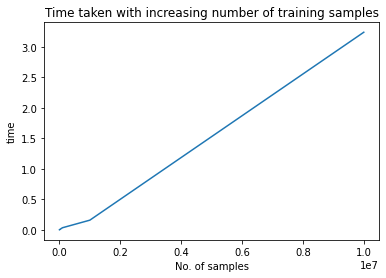

In [419]:
#Define different number of training samples
#np.arange(start,stop,step) : Return evenly spaced values within a given interval.
#source : https://numpy.org/doc/stable/reference/generated/numpy.linspace.html
no_sample_train = []
for j in range(1,8):
  no_sample_train.append(10**j)

#Define the noise variance of the noise added to the target variable
n_var = 0.05
#Define Number of samples for data_matrix
N = 300
#Define feature dimension
F = 10
#Define lambda
lam_2= 0.01
#Loop over different number of training samples
time_diff = []
for n_s in no_sample_train:
  #Generate data using previously defined functions
  x_d = data_matrix(n_s,F)
  #Define the weight vector to generate t vector
  W_v = np.random.rand(F+1)
  t = generate_t(x_d, W_v[1:], W_v[0], n_var)
  #Fit the linear regression model on data using previously defined functions
  #tic-toc function is used to calculate time to solve pseudo inverse
  tic1 = time.perf_counter()
  W_n = estimate_weights_L2_reg(x_d,t,lam_2)[0]#weight vetor using pseudo inverse and lambda small
  toc1 = time.perf_counter()
  time_diff.append(toc1-tic1)

# Plot the results using box plots
plt.plot(no_sample_train,time_diff)
plt.xlabel('No. of samples')
plt.ylabel('time')
plt.title('Time taken with increasing number of training samples')
plt.show()

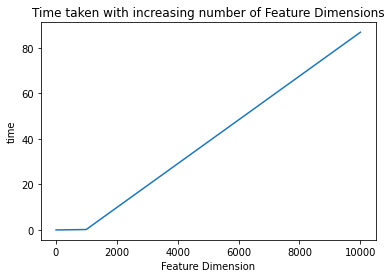

In [420]:
#Define different number of training samples
#np.arange(start,stop,step) : Return evenly spaced values within a given interval.
#source : https://numpy.org/doc/stable/reference/generated/numpy.linspace.html
f_dim_train = []
for j in range(1,5):
  f_dim_train.append(10**j)

#Define the noise variance of the noise added to the target variable
n_var = 0.05
#Define Number of samples for data_matrix
N = 300
#Define feature dimension
F = 10
#Define lambda
lam_2= 0.01
time_diff1 = []
#Loop over different number of training samples
for f_d in f_dim_train:
  #Generate data using previously defined functions
  x_d = data_matrix(N,f_d)
  #Define the weight vector to generate t vector
  W_v = np.random.rand(f_d+1)
  t = generate_t(x_d, W_v[1:], W_v[0], n_var)
  #Fit the linear regression model on data using previously defined functions
  tic2 = time.perf_counter()
  W_n = estimate_weights_L2_reg(x_d,t,lam_2)[0]#weight vetor using pseudo inverse and lambda small
  toc2 = time.perf_counter()
  time_diff1.append(toc2-tic2)

# Plot the results using box plots
plt.plot(f_dim_train,time_diff1)
plt.xlabel('Feature Dimension')
plt.ylabel('time')
plt.title('Time taken with increasing number of Feature Dimensions')
plt.show()

**Observation:** Time taken to solve pseudo inverse is linear with respect to no. of samples and variables

Breaking point(no. of samples) = 10^8

Breaking point(no. of variables) = 10^5

# (g)Training and validation NRMSE obtained using gradient descent with max_iter

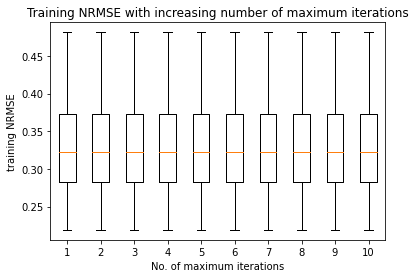

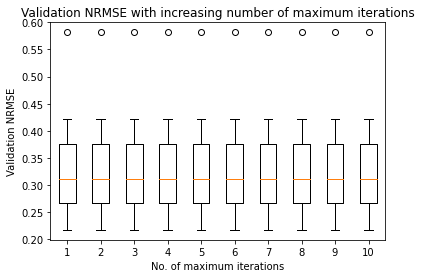

In [421]:
#Set the random seed to ensure the reproducibility of results
seed = 20
#Define different number of max. iteration
#np.arange(start,stop,step) : Return evenly spaced values within a given interval.
#source : https://numpy.org/doc/stable/reference/generated/numpy.linspace.html
max_iter_train =[10,50,100,200,400,800,1600,3200,6400,10000]
#Define the noise variance of the noise added to the target variable
n_var = 0.05
#Define Number of samples for data_matrix
N = 300
#Define feature dimension
F = 10
#Define lambdas
lam_1 = 0.01
lam_2 = 0.01
#Initialize arrays to store the training and validation NRMSE for each number of max. iterations
train_NRMSE_g = []
valid_NRMSE_g = []
#Loop over different number of training samples
for max_i in max_iter_train:
  train_NRMSE_seed = []
  valid_NRMSE_seed = []
  for i in range(seed):
    np.random.seed(i)
    #Generate data using previously defined functions
    x_d = data_matrix(N,F)
    #Define the weight vector to generate t vector
    W_v = np.random.randn(F+1)
    t = generate_t(x_d, W_v[1:], W_v[0], n_var)
    #Fit the linear regression model on data using previously defined functions
    W_n = linear_regression_gd(x_d, t, lam_1, lam_2, 1, max_i)[0]
    y = linear_reg_estimate(x_d, W_n[1:]) + W_n[0]
    #print(len(y))
    #splitting data into training and validation
    #training data
    t_train = t[:250]
    y_train = y[:250]
    #print(len(y_train))
    #Compute MSE on training data
    train_mse = mse(y_train,t_train)
    #Compute the NRMSE on training data
    train_NRMSE_seed.append(compute_NRMSE(train_mse, t_train))
    #validation data
    t_valid = t[250:]
    y_valid = y[250:]
    #print(len(y_valid))
    #Compute MSE on validation data
    valid_mse = mse(y_valid,t_valid)
    #Compute the NRMSE on validation data
    valid_NRMSE_seed.append(compute_NRMSE(valid_mse, t_valid))
  
  train_NRMSE_g.append(train_NRMSE_seed)
  valid_NRMSE_g.append(valid_NRMSE_seed)






# Plot the results using box plots
plt.boxplot(train_NRMSE_g)
plt.xlabel('No. of maximum iterations')
plt.ylabel('training NRMSE')
plt.title('Training NRMSE with increasing number of maximum iterations')
plt.show()

plt.boxplot(valid_NRMSE_g)
plt.xlabel('No. of maximum iterations')
plt.ylabel('Validation NRMSE')
plt.title('Validation NRMSE with increasing number of maximum iterations')
plt.show()


**Observation:** Error is constant with increasing maximum number of iterations

# (h)Training and validation NRMSE obtained using gradient descent with eta

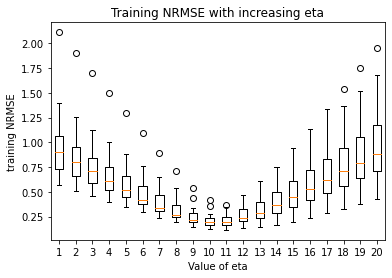

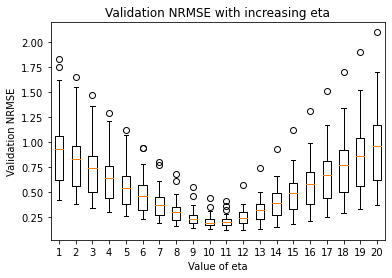

In [422]:
#Set the random seed to ensure the reproducibility of results
seed = 20
#Define different value of eta
#np.arange(start,stop,step) : Return evenly spaced values within a given interval.
#source : https://numpy.org/doc/stable/reference/generated/numpy.linspace.html
eta_train = np.arange(0.01, 2, 0.1)
#Define the noise variance of the noise added to the target variable
n_var = 0.05
#Define Number of samples for data_matrix
N = 300
#Define feature dimension
F = 10
#Define lambdas
lam_1 = 0.01
lam_2 = 0.01
#Initialize arrays to store the training and validation NRMSE for each eta
train_NRMSE_h = []
valid_NRMSE_h = []
#Loop over different number of training samples
for eta_t in eta_train:
  train_NRMSE_seed = []
  valid_NRMSE_seed = []
  for i in range(seed):
    np.random.seed(i)
    #Generate data using previously defined functions
    x_d = data_matrix(N,F)
    #Define the weight vector to generate t vector
    W_v = np.random.rand(F+1)
    t = generate_t(x_d, W_v[1:], W_v[0], n_var)
    #Fit the linear regression model on data using previously defined functions
    W_n = linear_regression_gd(x_d, t, lam_1, lam_2, eta_t)[0]
    y = linear_reg_estimate(x_d, W_n[1:]) + W_n[0]
    #print(len(y))
    #splitting data into training and validation
    #training data
    t_train = t[:250]
    y_train = y[:250]
    #print(len(y_train))
    #Compute MSE on training data
    train_mse = mse(y_train,t_train)
    #Compute the NRMSE on training data
    train_NRMSE_seed.append(compute_NRMSE(train_mse, t_train))
    #validation data
    t_valid = t[250:]
    y_valid = y[250:]
    #print(len(y_valid))
    #Compute MSE on validation data
    valid_mse = mse(y_valid,t_valid)
    #Compute the NRMSE on validation data
    valid_NRMSE_seed.append(compute_NRMSE(valid_mse, t_valid))
  
  train_NRMSE_h.append(train_NRMSE_seed)
  valid_NRMSE_h.append(valid_NRMSE_seed)






# Plot the results using box plots
plt.boxplot(train_NRMSE_h)
plt.xlabel('Value of eta')
plt.ylabel('training NRMSE')
plt.title('Training NRMSE with increasing eta')
plt.show()

plt.boxplot(valid_NRMSE_h)
plt.xlabel('Value of eta')
plt.ylabel('Validation NRMSE')
plt.title('Validation NRMSE with increasing eta')
plt.show()


**Observation:** As we increase eta,up to some point error will decrease but then it starts increasing as the path to reache the minimum will be zigzag type if step size is too large. Where the error is minimum, that is the optimum eta. 

# (i)Time taken to solve gradient descent with number of samples and number of variables and its breaking points

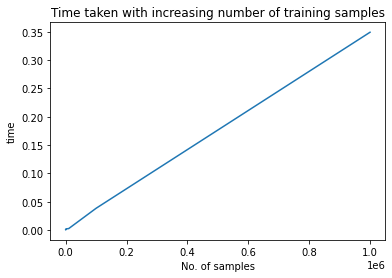

In [423]:
#Define different number of training samples
#np.arange(start,stop,step) : Return evenly spaced values within a given interval.
#source : https://numpy.org/doc/stable/reference/generated/numpy.linspace.html
#take no. of sample train in powers of 10
no_sample_train = []
for j in range(1,7):
  no_sample_train.append(10**j)

#Define the noise variance of the noise added to the target variable
n_var = 0.05
#Define Number of samples for data_matrix
N = 300
#Define feature dimension
F = 10
#Define lambdas
lam_1 = 0.01
lam_2 = 0.01
#Loop over different number of training samples
time_diff_i = []
for n_s in no_sample_train:
  #Generate data using previously defined functions
  x_d = data_matrix(n_s,F)
  #Define the weight vector to generate t vector
  W_v = np.random.rand(F+1)
  t = generate_t(x_d, W_v[1:], W_v[0], n_var)
  #Fit the linear regression model on data using previously defined functions
  #tic-toc function is used to calculate time to solve gradient descent
  tic_i1 = time.perf_counter()
  #calculating gradient descent for linear regression
  W_n = linear_regression_gd(x_d, t, lam_1, lam_2)[0]
  toc_i1 = time.perf_counter()
  time_diff_i.append(toc_i1-tic_i1)

# Plot the results using box plots
plt.plot(no_sample_train,time_diff_i)
plt.xlabel('No. of samples')
plt.ylabel('time')
plt.title('Time taken with increasing number of training samples')
plt.show()

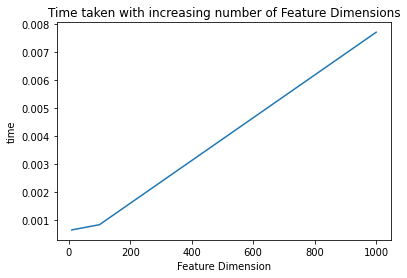

In [424]:
#Define different number of training samples
#np.arange(start,stop,step) : Return evenly spaced values within a given interval.
#source : https://numpy.org/doc/stable/reference/generated/numpy.linspace.html
f_dim_train = []
for j in range(1,4):
  f_dim_train.append(10**j)

#Define the noise variance of the noise added to the target variable
n_var = 0.05
#Define Number of samples for data_matrix
N = 300
#Define feature dimension
F = 10
#Define lambdas
lam_1 = 0.01
lam_2 = 0.01
time_diff_i1 = []
#Loop over different number of training samples
for f_d in f_dim_train:
  #Generate data using previously defined functions
  x_d = data_matrix(N,f_d)
  #Define the weight vector to generate t vector
  W_v = np.random.rand(f_d+1)
  t = generate_t(x_d, W_v[1:], W_v[0], n_var)
  #Fit the linear regression model on data using previously defined functions
  tic_i2 = time.perf_counter()
  W_n = linear_regression_gd(x_d, t, lam_1, lam_2)[0]
  toc_i2 = time.perf_counter()
  time_diff_i1.append(toc_i2-tic_i2)

# Plot the results using box plots
plt.plot(f_dim_train,time_diff_i1)
plt.xlabel('Feature Dimension')
plt.ylabel('time')
plt.title('Time taken with increasing number of Feature Dimensions')
plt.show()

**Obsevation:**Time taken to solve pseudo inverse is linear with respect to no. of samples and variables

Breaking point(no. of samples) = 10^7

Breaking point(no. of variables) = 10^4

# (j)Time taken to solve gradient descent with number of variables and its breaking point 

Already covered in (i)

# (k)Training and validation NRMSE and number of nearly zero weights obtained using gradient descent with lambda2 

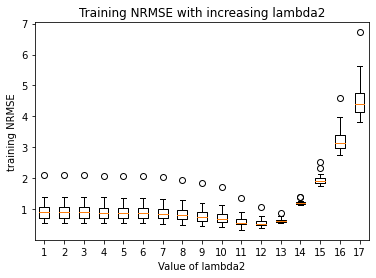

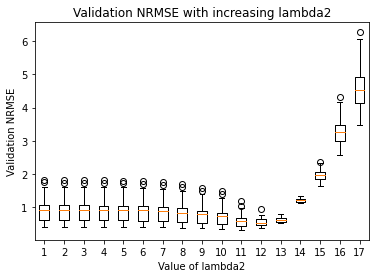

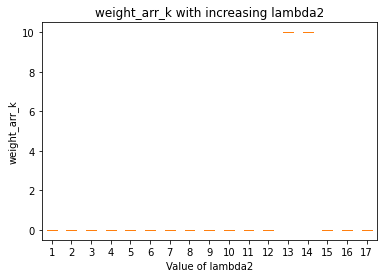

In [425]:
#Set the random seed to ensure the reproducibility of results
seed = 20
#Define different lambda2
#np.arange(start,stop,step) : Return evenly spaced values within a given interval.
#source : https://numpy.org/doc/stable/reference/generated/numpy.linspace.html
lam_2_train = [ 0.1, 0.5, 1, 3, 4, 5,10,20, 35, 50,100,150,200,350,500,750,1000]
#Define the noise variance of the noise added to the target variable
n_var = 0.05
#Define Number of samples for data_matrix
N = 300
#Define feature dimension
F = 10
#Define lambdas
lam_1 = 0.01
lam_2 = 0.01
#Define threshold such that if value of weight is less than that threshold then weight will be nearly equal to 0
th_k = 0.5
#Initialize arrays to store the training and validation NRMSE for each number of training samples
train_NRMSE_k = []
valid_NRMSE_k = []
weight_arr_k = []
#Loop over different lambda2
for lam_2i in lam_2_train:
  train_NRMSE_seed = []
  valid_NRMSE_seed = []
  weight_arr_seed = []
  for i in range(seed):
    np.random.seed(i)
    #Generate data using previously defined functions
    x_d = data_matrix(N,F)
    #Define the weight vector to generate t vector
    W_v = np.random.rand(F+1)
    t = generate_t(x_d, W_v[1:], W_v[0], n_var)
    #Fit the linear regression model on data using previously defined functions
    W_n = linear_regression_gd(x_d, t, lam_1, lam_2i)[0]
    y = linear_reg_estimate(x_d, W_n[1:]) + W_n[0]
    #print(len(y))
    #splitting data into training and validation
    #training data
    t_train = t[:250]
    y_train = y[:250]
    #print(len(y_train))
    #Compute MSE on training data
    train_mse = mse(y_train,t_train)
    #Compute the NRMSE on training data
    train_NRMSE_seed.append(compute_NRMSE(train_mse, t_train))
    #validation data
    t_valid = t[250:]
    y_valid = y[250:]
    #print(len(y_valid))
    #Compute MSE on validation data
    valid_mse = mse(y_valid,t_valid)
    #Compute the NRMSE on validation data
    valid_NRMSE_seed.append(compute_NRMSE(valid_mse, t_valid))
    weight_arr_seed.append(np.sum(np.abs(W_n)<th_k))
  train_NRMSE_k.append(train_NRMSE_seed)
  valid_NRMSE_k.append(valid_NRMSE_seed)
  weight_arr_k.append(weight_arr_seed)
# Plot the results using box plots
plt.boxplot(train_NRMSE_k)
plt.xlabel('Value of lambda2')
plt.ylabel('training NRMSE')
plt.title('Training NRMSE with increasing lambda2')
plt.show()

plt.boxplot(valid_NRMSE_k)
plt.xlabel('Value of lambda2')
plt.ylabel('Validation NRMSE')
plt.title('Validation NRMSE with increasing lambda2')
plt.show()

plt.boxplot(weight_arr_k)
plt.xlabel('Value of lambda2')
plt.ylabel('weight_arr_k')
plt.title('weight_arr_k with increasing lambda2')
plt.show()


**Observation:** As the lambda2 increases, error decreases for sometime, reaches an optimum value where error is minimum and then increases because, this is because all the weights approaches to 0, and away from MSE as lambda2 increases.

Number of weights nearly to 0 incearses when lambda2 starts increases.

**Optimum Lambda2:** 150

# (l)Training and validation NRMSE and number of nearly zero weights obtained using gradient descent with lambda1

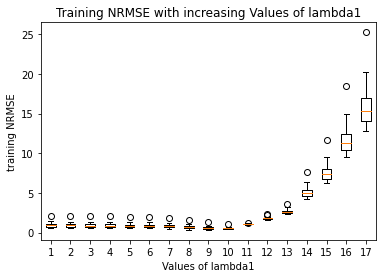

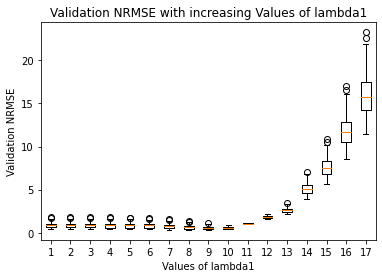

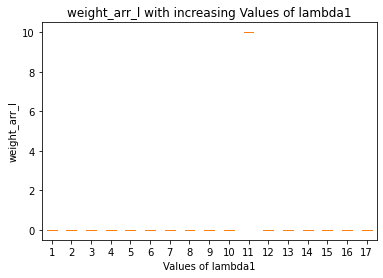

In [426]:
#Set the random seed to ensure the reproducibility of results
seed = 20
#Define different lambda1
#np.arange(start,stop,step) : Return evenly spaced values within a given interval.
#source : https://numpy.org/doc/stable/reference/generated/numpy.linspace.html
lam_1_train = [ 0.1, 0.5, 1, 3, 4, 5,10,20, 35, 50,100,150,200,350,500,750,1000]
#Define the noise variance of the noise added to the target variable
n_var = 0.05
#Define Number of samples for data_matrix
N = 300
#Define feature dimension
F = 10
#Define lambdas
lam_1 = 0.01
lam_2 = 0.01
#Define threshold such that if value of weight is less than that threshold then weight will be nearly equal to 0
th_l = 0.1
#Initialize arrays to store the training and validation NRMSE for each number of training samples
train_NRMSE_l = []
valid_NRMSE_l = []
weight_arr_l = []
#Loop over different lambda1
for lam_1i in lam_1_train:
  train_NRMSE_seed = []
  valid_NRMSE_seed = []
  weight_arr_seed = []
  for i in range(seed):
    np.random.seed(i)
    #Generate data using previously defined functions
    x_d = data_matrix(N,F)
    #Define the weight vector to generate t vector
    W_v = np.random.rand(F+1)
    t = generate_t(x_d, W_v[1:], W_v[0], n_var)
    #Fit the linear regression model on data using previously defined functions
    W_n = linear_regression_gd(x_d, t, lam_1i, lam_2)[0]
    y = linear_reg_estimate(x_d, W_n[1:]) + W_n[0]
    #print(len(y))
    #splitting data into training and validation
    #training data
    t_train = t[:250]
    y_train = y[:250]
    #print(len(y_train))
    #Compute MSE on training data
    train_mse = mse(y_train,t_train)
    #Compute the NRMSE on training data
    train_NRMSE_seed.append(compute_NRMSE(train_mse, t_train))
    #validation data
    t_valid = t[250:]
    y_valid = y[250:]
    #print(len(y_valid))
    #Compute MSE on validation data
    valid_mse = mse(y_valid,t_valid)
    #Compute the NRMSE on validation data
    valid_NRMSE_seed.append(compute_NRMSE(valid_mse, t_valid))
    weight_arr_seed.append((np.sum(np.abs(W_n)<th_l)))
  train_NRMSE_l.append(train_NRMSE_seed)
  valid_NRMSE_l.append(valid_NRMSE_seed)
  weight_arr_l.append(weight_arr_seed)
# Plot the results using box plots
plt.boxplot(train_NRMSE_l)
plt.xlabel('Values of lambda1')
plt.ylabel('training NRMSE')
plt.title('Training NRMSE with increasing Values of lambda1')
plt.show()

plt.boxplot(valid_NRMSE_l)
plt.xlabel('Values of lambda1')
plt.ylabel('Validation NRMSE')
plt.title('Validation NRMSE with increasing Values of lambda1')
plt.show()

plt.boxplot(weight_arr_l)
plt.xlabel('Values of lambda1')
plt.ylabel('weight_arr_l')
plt.title('weight_arr_l with increasing Values of lambda1')
plt.show()

**Observation:** As the lambda1 increases, error decreases for sometime, reaches an optimum value where error is minimum and then increases because, this is because all the weights approaches to 0 as lambda1 increases.

Number of weights nearly to 0 incearses when lambda1 starts increases as L1 norm eliminate the variables.

**Optimum lambda 1:** 50

# (m)Training and validation NRMSE for optimal lambda2 with noise variance

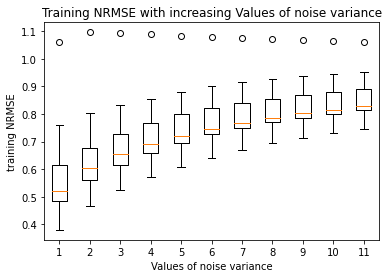

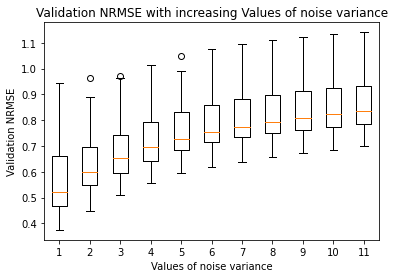

In [427]:
#Set the random seed to ensure the reproducibility of results
seed = 20
#Define different noise variance
#np.arange(start,stop,step) : Return evenly spaced values within a given interval.
#source : https://numpy.org/doc/stable/reference/generated/numpy.linspace.html
n_var_train = np.arange(0.01, 5.1, 0.5)
#Define the noise variance of the noise added to the target variable
n_var = 0.05
#Define Number of samples for data_matrix
N = 300
#Define feature dimension
F = 10
#Define lambdas
lam_1 = 0.01
op_lam_2 = 150
#Initialize arrays to store the training and validation NRMSE for each number of training samples
train_NRMSE_m = []
valid_NRMSE_m = []
#Loop over different noise variance
for n_vari in n_var_train:
  train_NRMSE_seed = []
  valid_NRMSE_seed = []
  for i in range(seed):
    np.random.seed(i)
    #Generate data using previously defined functions
    x_d = data_matrix(N,F)
    #Define the weight vector to generate t vector
    W_v = np.random.rand(F+1)
    t = generate_t(x_d, W_v[1:], W_v[0], n_vari)
    #Fit the linear regression model on data using previously defined functions
    W_n = linear_regression_gd(x_d, t, lam_1, op_lam_2)[0]
    y = linear_reg_estimate(x_d, W_n[1:]) + W_n[0]
    #print(len(y))
    #splitting data into training and validation
    #training data
    t_train = t[:250]
    y_train = y[:250]
    #print(len(y_train))
    #Compute MSE on training data
    train_mse = mse(y_train,t_train)
    #Compute the NRMSE on training data
    train_NRMSE_seed.append(compute_NRMSE(train_mse, t_train))
    #validation data
    t_valid = t[250:]
    y_valid = y[250:]
    #print(len(y_valid))
    #Compute MSE on validation data
    valid_mse = mse(y_valid,t_valid)
    #Compute the NRMSE on validation data
    valid_NRMSE_seed.append(compute_NRMSE(valid_mse, t_valid))
  train_NRMSE_m.append(train_NRMSE_seed)
  valid_NRMSE_m.append(valid_NRMSE_seed)
# Plot the results using box plots
plt.boxplot(train_NRMSE_m)
plt.xlabel('Values of noise variance')
plt.ylabel('training NRMSE')
plt.title('Training NRMSE with increasing Values of noise variance')
plt.show()

plt.boxplot(valid_NRMSE_m)
plt.xlabel('Values of noise variance')
plt.ylabel('Validation NRMSE')
plt.title('Validation NRMSE with increasing Values of noise variance')
plt.show()

**Observation:** As noise variance at optimum lambda2 increases, error also increases, because error is gaussian distribution, it increases as noise variance increases.

# (n)Training and validation NRMSE for optimal lambda1 with noise variance 

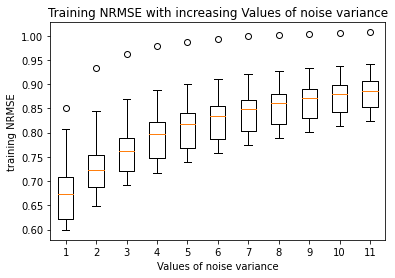

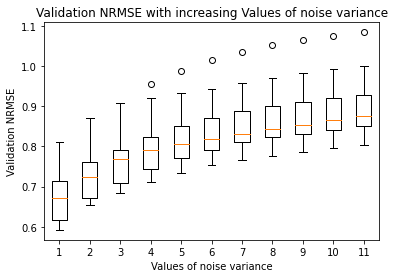

In [428]:
#Set the random seed to ensure the reproducibility of results
seed = 20
#Define different number of training samples
#np.arange(start,stop,step) : Return evenly spaced values within a given interval.
#source : https://numpy.org/doc/stable/reference/generated/numpy.linspace.html
n_var_train = np.arange(0.01, 5.1, 0.5)
#Define the noise variance of the noise added to the target variable
n_var = 0.05
#Define Number of samples for data_matrix
N = 300
#Define feature dimension
F = 10
#Define lambdas
op_lam_1 = 70
lam_2 = 0.01
#Initialize arrays to store the training and validation NRMSE for each number of training samples
train_NRMSE_n = []
valid_NRMSE_n = []
#Loop over different number of training samples
for n_vari in n_var_train:
  train_NRMSE_seed = []
  valid_NRMSE_seed = []
  for i in range(seed):
    np.random.seed(i)
    #Generate data using previously defined functions
    x_d = data_matrix(N,F)
    #Define the weight vector to generate t vector
    W_v = np.random.rand(F+1)
    t = generate_t(x_d, W_v[1:], W_v[0], n_vari)
    #Fit the linear regression model on data using previously defined functions
    W_n = linear_regression_gd(x_d, t, op_lam_1, lam_2)[0]
    y = linear_reg_estimate(x_d, W_n[1:]) + W_n[0]
    #print(len(y))
    #splitting data into training and validation
    #training data
    t_train = t[:250]
    y_train = y[:250]
    #print(len(y_train))
    #Compute MSE on training data
    train_mse = mse(y_train,t_train)
    #Compute the NRMSE on training data
    train_NRMSE_seed.append(compute_NRMSE(train_mse, t_train))
    #validation data
    t_valid = t[250:]
    y_valid = y[250:]
    #print(len(y_valid))
    #Compute MSE on validation data
    valid_mse = mse(y_valid,t_valid)
    #Compute the NRMSE on validation data
    valid_NRMSE_seed.append(compute_NRMSE(valid_mse, t_valid))
  train_NRMSE_n.append(train_NRMSE_seed)
  valid_NRMSE_n.append(valid_NRMSE_seed)
# Plot the results using box plots
plt.boxplot(train_NRMSE_n)
plt.xlabel('Values of noise variance')
plt.ylabel('training NRMSE')
plt.title('Training NRMSE with increasing Values of noise variance')
plt.show()

plt.boxplot(valid_NRMSE_n)
plt.xlabel('Values of noise variance')
plt.ylabel('Validation NRMSE')
plt.title('Validation NRMSE with increasing Values of noise variance')
plt.show()

**Observation:** As noise variance at optimum lambda1 increases, error also increases, because error is gaussian distribution, it increases as noise variance increases.

#(o) Experiment (f) but, this time with number of training samples and number of variables 

Already done earlier

# Q14. Write your overall learning points by doing entire assignment. 


I learned following things from the assignment:


*   It enhanced my python skills, like various functions on array, how to define various functions.
*   It cleared some of the concepts (like gradient descent and relation with lambdas) that I wasn't able to understand properly in class because it was theoritical at that time but now since I got to implement it practically, I have much clear understanding of those things.
*   Got to know about the seed function and boxplots


#15. Quote your references, including roll numbers of fellow students with whom you discussed. Be specific about which part was inspired by what source or which friend.

I have written sources in comments of that part where I used them.

I took help from Sanket Potdar(20D070078) for Q13.